In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle
warnings.filterwarnings('ignore')
import matplotlib.style as style
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns
import missingno as msno
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns

#for visualizing missing data

In [39]:
train=pd.read_csv("/content/drive/MyDrive/Projects/insurance.csv")

In [40]:
train.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014 0:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015 0:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006 0:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015 0:00,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000 0:00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015 0:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990 0:00,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015 0:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014 0:00,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015 0:00,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [41]:
train.shape

(1000, 39)

In [42]:
train.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [43]:
train.dtypes

,0
months_as_customer,int64
age,int64
policy_number,int64
policy_bind_date,object
policy_state,object
policy_csl,object
policy_deductable,int64
policy_annual_premium,float64
umbrella_limit,int64
insured_zip,int64


In [44]:
train.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


analysis:

1. Customer-Related Insights
Months as Customer:

Mean: 204 months (17 years)
Min: 0 months (new customers)
Max: 479 months (~40 years)
Customers are spread across a wide range, with some long-term clients.
Age:

Mean: 39 years
Min: 19 years (young drivers)
Max: 64 years (older customers)
The standard deviation (~9.14) suggests a fairly diverse age distribution.

2. Policy-Related Metrics
Policy Deductible:
Values range between 500 and 2000.
Median: 1000, meaning most customers have a mid-range deductible.

Annual Premium:
Mean: $1256, with a wide range ($433 to $2047).
Higher premiums might indicate comprehensive coverage or riskier customers.
Umbrella Limit:
Mean: 1.1 million, but min value of -1 million suggests potential data errors.

3. Location-Based Attributes
Insured ZIP Codes:
Mean: 501214, standard deviation ~71,701 suggests customers are widely distributed.
The range (430,104 to 620,962) covers multiple locations.

4. Financial Aspects
Capital Gains & Losses:
Some extreme negative values (-111,100 loss) indicate potential outliers or incorrect data entries.
Most values seem to be 0, suggesting limited capital transactions for many customers.

5. Incident & Claim Analysis
Incident Hour of the Day:
Mean: ~11.6 hours (around midday).
Min: 0 hours and max: 23 hours suggest incidents occur at all times.

Number of Vehicles Involved:
Mean: 1.83, indicating most incidents involve single vehicles.
Max: 4, suggesting multi-car collisions in rare cases.
Total Claim Amount:

Mean: $52,761 with high variability.
Max claim: $114,920.

6. Claim Components
Injury Claim:
Mean: ~$7433, suggesting moderate injury-related payouts.
Some zero values indicate cases without injuries.
Property & Vehicle Claims:

Vehicle claims are significant (~$37,928 on average).
Some minimal values (e.g., $70) suggest minor damages.

7. Auto-Related Data
Auto Year:
Mean: 2005, suggesting older vehicles in claims.
Max: 2015, meaning the newest cars are ~10 years old.
Key Takeaways
Data Issues:

Negative values in umbrella limit and capital loss indicate errors or anomalies.
High standard deviations in claims, zip codes, and capital metrics suggest the need for data cleaning.
Business Insights:

Long-term customers exist, but there are also newer ones.
Mid-range policy deductibles ($1000) are most common.
The majority of accidents involve single vehicles, occurring around midday.
Injury claims are present but not always included in incidents.
Potential Next Steps:

Outlier analysis for umbrella limits and financial attributes.
Further segmentation based on customer tenure, age, and vehicle model.
Investigation into claims with very low payouts.

In [45]:
train.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000,909,1000,1000,1000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,2,7,14,20,6,NaN,NaN,60,4,4,4,4,7,7,1000,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,NaN,1/1/2006 0:00,OH,250/500,NaN,NaN,NaN,NaN,FEMALE,JD,machine-op-inspct,reading,own-child,NaN,NaN,2/2/2015 0:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,9935 4th Drive,NaN,NaN,?,NaN,NaN,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,537,161,93,64,183,NaN,NaN,28,419,292,354,292,262,157,1,NaN,NaN,360,NaN,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,NaN,NaN,NaN,NaN,NaN,25126.100000,-26793.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.644000,1.83900,NaN,0.992000,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,NaN,NaN,NaN,NaN,NaN,27872.187708,28104.096686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.951373,1.01888,NaN,0.820127,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,NaN,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN,0.000000,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-51500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.00000,NaN,0.000000,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,NaN,NaN,NaN,NaN,NaN,0.000000,-23250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.00000,NaN,1.000000,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,NaN,NaN,NaN,NaN,NaN,51025.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.00000,NaN,2.000000,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN


# Getting dataset basic info()

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

  # Observations:
  policy_bind_date  should be in date format it is object format


# Converting to Date time format

In [47]:
# Convert to datetime format
train['policy_bind_date'] = pd.to_datetime(train['policy_bind_date'], format='%m/%d/%Y %H:%M')
train['incident_date'] = pd.to_datetime(train['incident_date'], format='%m/%d/%Y %H:%M')

# Checking duplicates

In [48]:
train.duplicated().sum()

0

# Checking null values()

In [49]:
train.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df_temp = train.dropna(subset=['authorities_contacted'])

# Select features and target variable
X = df_temp[['months_as_customer', 'age', 'policy_number', 'policy_deductable',
             'policy_annual_premium', 'umbrella_limit', 'capital-gains',
             'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
             'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
             'property_claim', 'vehicle_claim', 'auto_year']]

y = df_temp['authorities_contacted']

# Train the model
clf = RandomForestClassifier()
clf.fit(X, y)

# Predict missing values
missing_idx = train['authorities_contacted'].isna()
train.loc[missing_idx, 'authorities_contacted'] = clf.predict(train.loc[missing_idx, X.columns])

# Display updated DataFrame
print(train['authorities_contacted'].isna().sum())  # Should be 0 if all missing values were filled

0


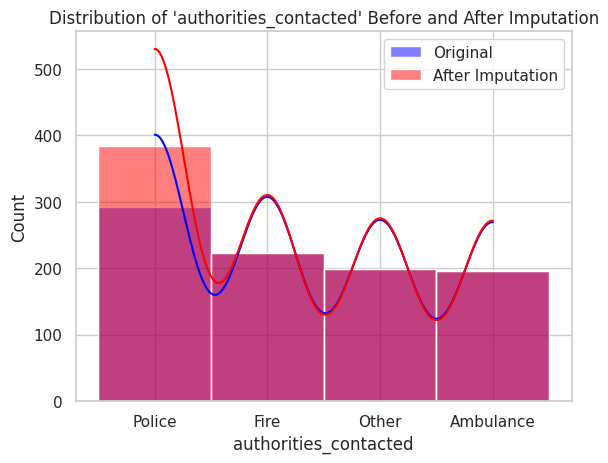

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_temp['authorities_contacted'], kde=True, label='Original', color='blue')
sns.histplot(train['authorities_contacted'], kde=True, label='After Imputation', color='red', alpha=0.5)

plt.legend()
plt.title("Distribution of 'authorities_contacted' Before and After Imputation")
plt.show()


# Checking unique values

In [52]:
for i in train.columns:
  print({i:train[i].unique()})

{'months_as_customer': array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,

# Checking special values

In [53]:
import re

# Function to check for special characters in each column
def check_special_chars(df):
    special_chars = set()

    for col in df.columns:
        if df[col].dtype == 'object':  # Only check string columns
            for value in df[col].dropna():
                matches = re.findall(r'[^\w\s]', str(value))  # Find non-alphanumeric and non-space characters
                if matches:
                    special_chars.update(matches)  # Store unique special characters

    return special_chars

# Get special characters in the dataset
special_characters_found = check_special_chars(train)
print("Special characters found:", special_characters_found)


Special characters found: {'?', '/', '-'}


# Replace '?' with 0 in all object (string) columns

In [54]:
train = train.replace('?', 'suspicious')

# Numeric Columns and Categorical Columns

In [55]:
n_cols=[]

for i in train.columns:
  if train[i].dtypes==('int64','float64'):
    n_cols.append(i)
n_cols

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [56]:
c_cols=[]
for i in train.columns:
  if train[i].dtypes=='object':
    c_cols.append(i)
c_cols

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

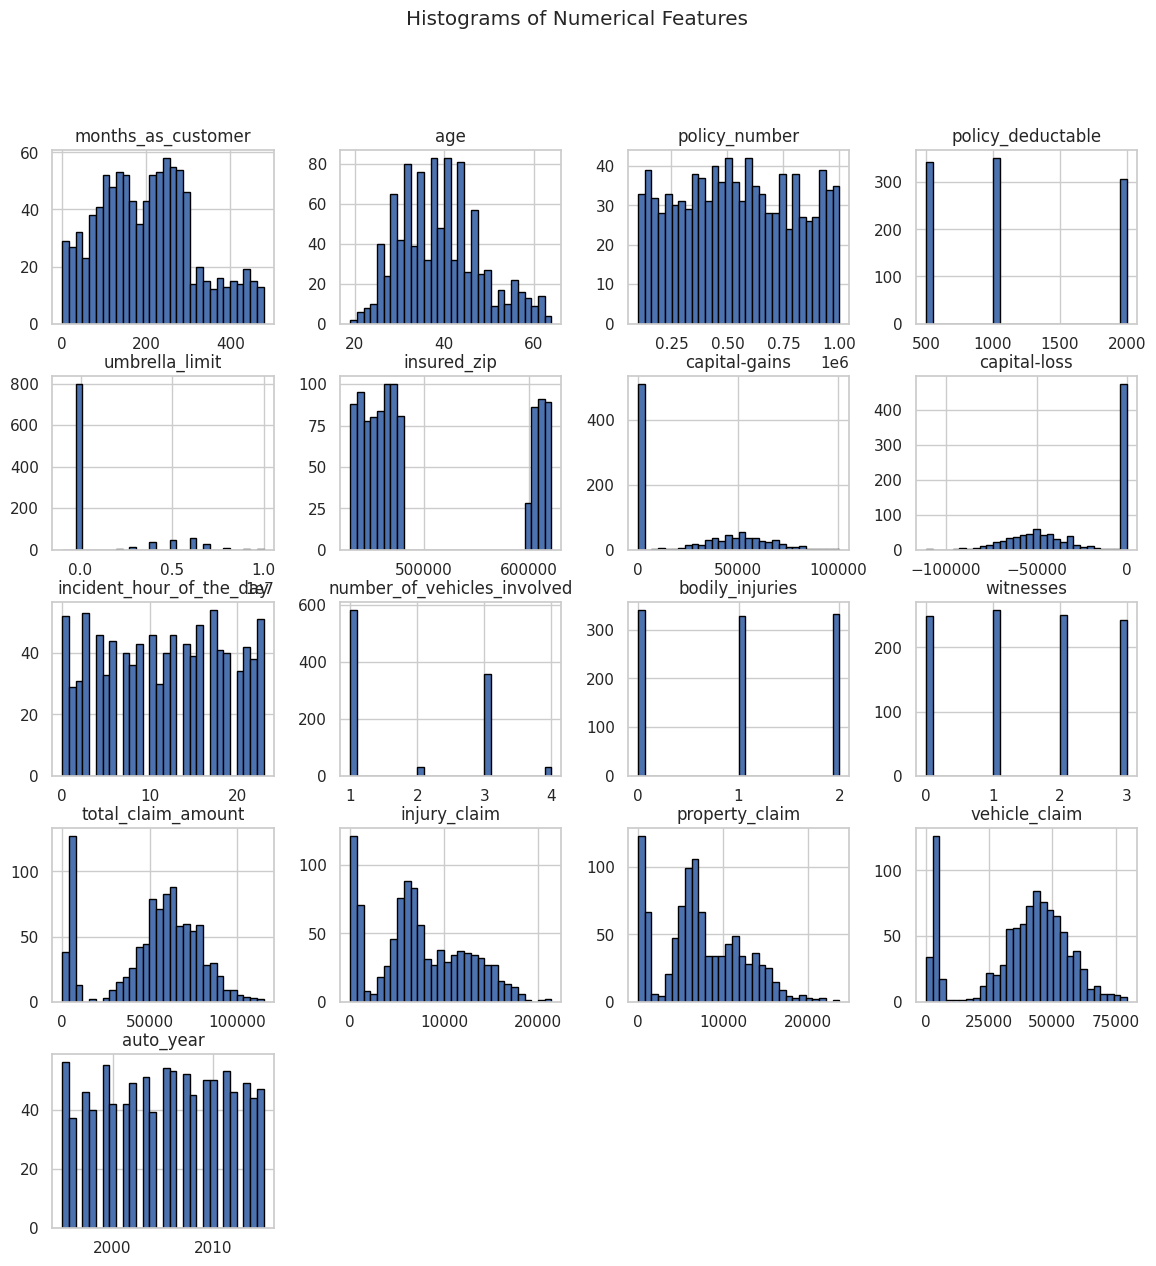

In [57]:
# Set style
sns.set(style="whitegrid")

num_cols = ['months_as_customer','age','policy_number','policy_deductable','umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']
cat_cols = ['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

# Histograms for numerical features
train[num_cols].hist(figsize=(14, 14), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Lets create violin plot for our numerical columns to understand the values and any anomaly in our data


In [58]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define numerical columns
num_cols = [
    'months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit',
    'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
    'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount',
    'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'
]

# Create subplots
fig = make_subplots(
    rows=6, cols=3, start_cell="bottom-left",
    subplot_titles=[
        "Months as Customer", "Age", "Policy Number", "Policy Deductible", "Umbrella Limit",
        "Insured Zip", "Capital Gains", "Capital Loss", "Incident Hour",
        "Vehicles Involved", "Bodily Injuries", "Witnesses", "Total Claim Amount",
        "Injury Claim", "Property Claim", "Vehicle Claim", "Auto Year"
    ]
)

# Add violin plots dynamically
row, col = 1, 1
for i, col_name in enumerate(num_cols):
    fig.add_trace(
        go.Violin(y=train[col_name], name=col_name, box_visible=True, meanline_visible=True),
        row=row, col=col
    )
    col += 1
    if col > 3:  # Move to next row after 3 columns
        col = 1
        row += 1

# Update layout
fig.update_layout(height=1500, width=1500, title_text="Distribution of Numerical Features (Violin Plots)")

fig.show()


In [59]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Categorical columns
cat_cols = [
    'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
    'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date',
    'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted',
    'incident_state', 'incident_city', 'incident_location', 'property_damage',
    'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'
]

# Define subplot layout
num_rows = 7  # Adjusted for better visualization
num_cols = 3

# Create subplots
fig = make_subplots(
    rows=num_rows, cols=num_cols,
    subplot_titles=cat_cols
)

# Add bar plots dynamically
for i, col in enumerate(cat_cols):
    row, col_num = divmod(i, num_cols)  # Compute row/col indices
    value_counts = train[col].value_counts()

    fig.add_trace(
        go.Bar(x=value_counts.index, y=value_counts.values, name=col),
        row=row + 1, col=col_num + 1
    )

# Update layout
fig.update_layout(
    height=2000, width=1500,
    title_text="Categorical Feature Distribution",
    showlegend=False
)

fig.show()


# Policy bind date Distribution
Monthly

In [60]:
import plotly.graph_objects as go

# Resample revenue by month
monthly_revenue = train.resample('M', on='policy_bind_date')['total_claim_amount'].sum().reset_index()

# Create figure
fig = go.Figure()

# **Line Chart with Hover Tooltip**
fig.add_trace(go.Scatter(
    x=monthly_revenue['policy_bind_date'],
    y=monthly_revenue['total_claim_amount'],
    mode='lines+markers',
    marker=dict(size=6, color='royalblue'),
    line=dict(width=2),
    name="Monthly Claims",
    hovertemplate="<b>%{x}</b><br>Total Claims: $%{y:,.0f}<extra></extra>"  # Clean hover text
))

# **Slider for Navigation**
fig.update_layout(
    title="Interactive Monthly Revenue Trend",
    xaxis_title="Month",
    yaxis_title="Total Claims ($)",
    template="plotly_white",
    hovermode="x unified",  # Improves hover readability
    xaxis=dict(
        rangeslider=dict(visible=True),  # Slider to navigate
        type="date"
    )
)

# Show plot
fig.show()


# Quaterly Claims

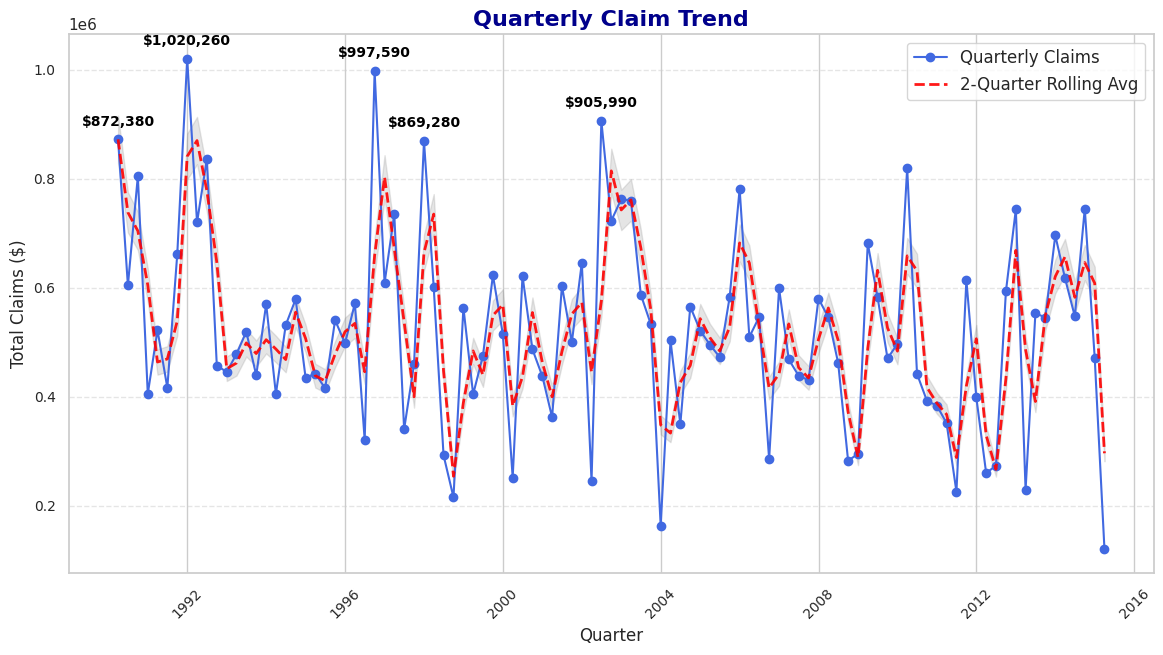

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure date column is in datetime format
train['policy_bind_date'] = pd.to_datetime(train['policy_bind_date'])

# Resample revenue by quarter
quarterly_revenue = train.resample('Q', on='policy_bind_date')['total_claim_amount'].sum()

# Calculate rolling average (2-quarter window for better smoothing)
rolling_avg = quarterly_revenue.rolling(window=2, min_periods=1).mean()

# Create figure
plt.figure(figsize=(14, 7))
plt.plot(quarterly_revenue, marker='o', linestyle='-', color='royalblue', markersize=6, label="Quarterly Claims")
plt.plot(rolling_avg, linestyle="--", color="red", linewidth=2, alpha=0.9, label="2-Quarter Rolling Avg")  # Smooth trend

# Highlight Key Revenue Points (Top 5 highest quarters)
top_revenues = quarterly_revenue.nlargest(5)
for i in top_revenues.index:
    plt.annotate(f"${quarterly_revenue[i]:,.0f}",
                 (i, quarterly_revenue[i]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center', fontsize=10, color='black', weight='bold')

# Shaded area for better trend visualization
plt.fill_between(quarterly_revenue.index, rolling_avg * 0.95, rolling_avg * 1.05, color='gray', alpha=0.2)

# Titles & Styling
plt.title("Quarterly Claim Trend", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Total Claims ($)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.legend(fontsize=12)

# Show plot
plt.show()


# Yearly Claims

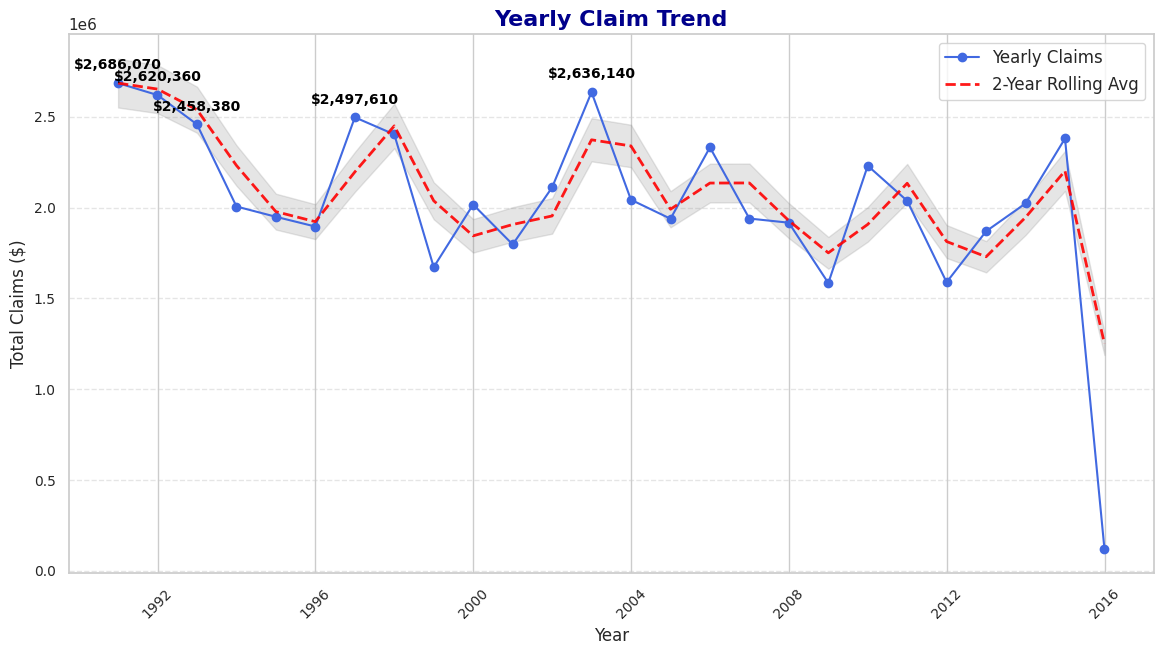

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure date column is in datetime format
train['policy_bind_date'] = pd.to_datetime(train['policy_bind_date'])

# Resample revenue by year
yearly_revenue = train.resample('Y', on='policy_bind_date')['total_claim_amount'].sum()

# Calculate rolling average (2-year window for smoother trend)
rolling_avg = yearly_revenue.rolling(window=2, min_periods=1).mean()

# Create figure
plt.figure(figsize=(14, 7))
plt.plot(yearly_revenue, marker='o', linestyle='-', color='royalblue', markersize=6, label="Yearly Claims")
plt.plot(rolling_avg, linestyle="--", color="red", linewidth=2, alpha=0.9, label="2-Year Rolling Avg")  # Smooth trend

# Highlight Key Revenue Points (Top 5 highest years)
top_revenues = yearly_revenue.nlargest(5)
for i in top_revenues.index:
    plt.annotate(f"${yearly_revenue[i]:,.0f}",
                 (i, yearly_revenue[i]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center', fontsize=10, color='black', weight='bold')

# Shaded area for better trend visualization
plt.fill_between(yearly_revenue.index, rolling_avg * 0.95, rolling_avg * 1.05, color='gray', alpha=0.2)

# Titles & Styling
plt.title("Yearly Claim Trend", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Claims ($)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.legend(fontsize=12)

# Show plot
plt.show()


In [63]:
train.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,suspicious,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,suspicious,0,0,suspicious,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,suspicious,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,suspicious,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


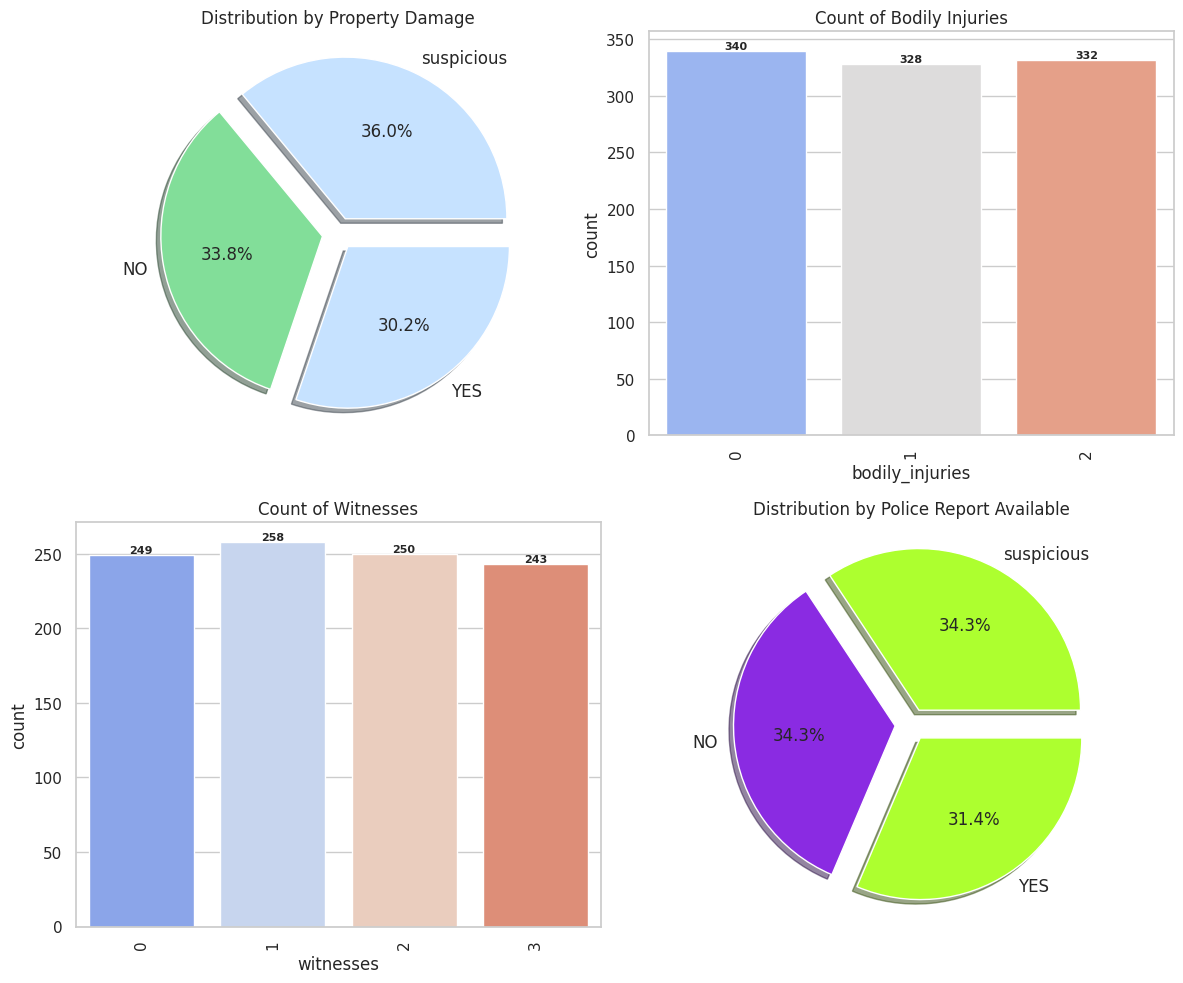

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Pie Chart: Property Damage**
explode_da = [0.1] * len(train['property_damage'].value_counts())
axes[0, 0].pie(
    train['property_damage'].value_counts(),
    explode=explode_da,
    autopct='%1.1f%%',
    shadow=True,
    labels=train['property_damage'].value_counts().index.tolist(),
    colors=['#C6E2FF', '#82DE99'],
    textprops={'fontsize': 12}
)
axes[0, 0].set_title('Distribution by Property Damage')

#  Countplot: Bodily Injuries**
sns.countplot(x=train['bodily_injuries'], ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title("Count of Bodily Injuries")
axes[0, 1].tick_params(axis='x', rotation=90)

# Add labels on top of bars
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%d', label_type='edge', fontweight='bold', fontsize=8)

# Countplot: Witnesses**
sns.countplot(x=train['witnesses'], ax=axes[1, 0], palette="coolwarm")
axes[1, 0].set_title("Count of Witnesses")
axes[1, 0].tick_params(axis='x', rotation=90)

# Add labels on top of bars
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%d', label_type='edge', fontweight='bold', fontsize=8)

#  Pie Chart: Police Report Available**
explode_po = [0.1] * len(train['police_report_available'].value_counts())
axes[1, 1].pie(
    train['police_report_available'].value_counts(),
    explode=explode_po,
    autopct='%1.1f%%',
    shadow=True,
    labels=train['police_report_available'].value_counts().index.tolist(),
    colors=['#ADFF2F', '#8A2BE2'],
    textprops={'fontsize': 12}
)
axes[1, 1].set_title('Distribution by Police Report Available')

# Adjust layout
plt.tight_layout()
plt.show()


# Incident hour and number of vehicles involved

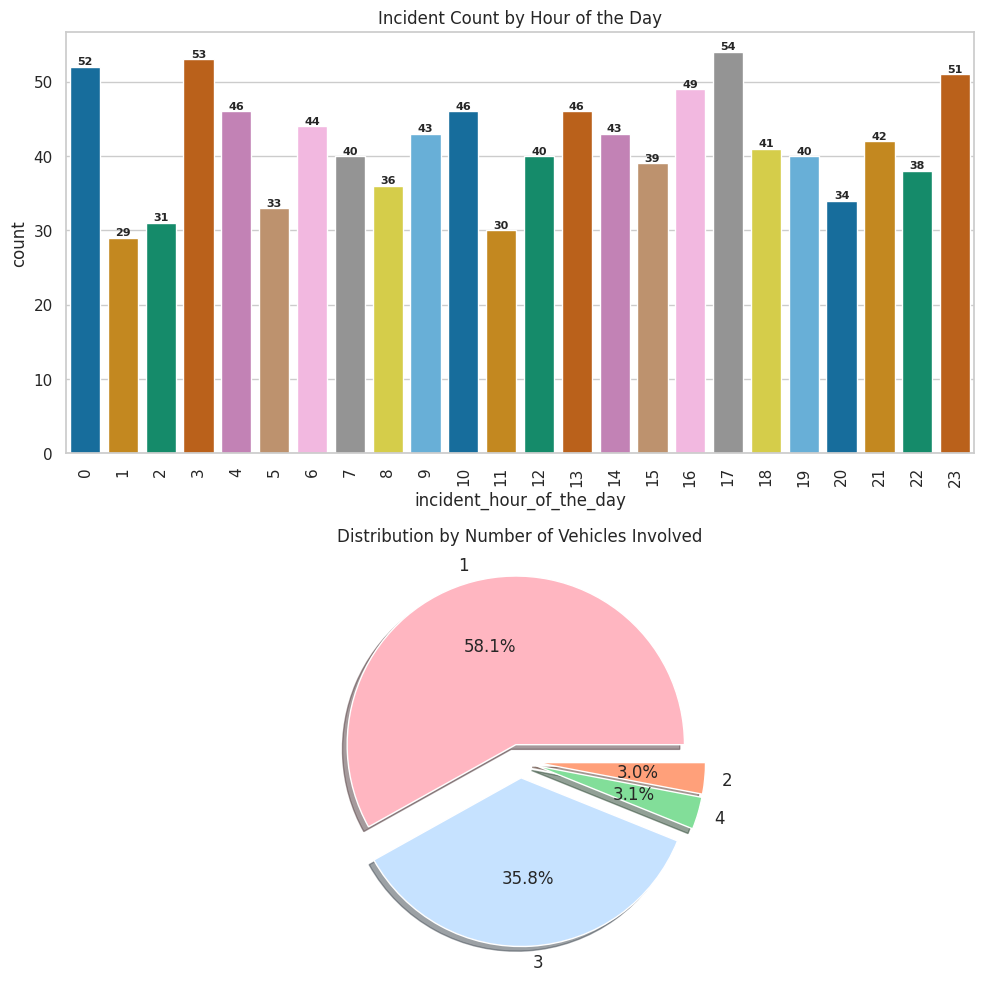

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# ** 1️ Countplot for Incident Hour of the Day**
sns.countplot(x=train['incident_hour_of_the_day'], ax=axes[0], palette="colorblind")
axes[0].set_title("Incident Count by Hour of the Day")
axes[0].tick_params(axis='x', rotation=90)

# Add labels on top of bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontweight='bold', fontsize=8)

# **2️ Pie Chart for Number of Vehicles Involved**
explode_v = [0.1] * len(train['number_of_vehicles_involved'].value_counts())

axes[1].pie(
    train['number_of_vehicles_involved'].value_counts(),
    explode=explode_v,
    autopct='%1.1f%%',
    shadow=True,
    labels=train['number_of_vehicles_involved'].value_counts().index.tolist(),  # FIXED
    colors=['#FFB6C1', '#C6E2FF', '#82DE99', '#FFA07A'],  # Added more colors
    textprops={'fontsize': 12}
)
axes[1].set_title("Distribution by Number of Vehicles Involved")

# Adjust layout
plt.tight_layout()
plt.show()


# Collision Type and Incident Severity

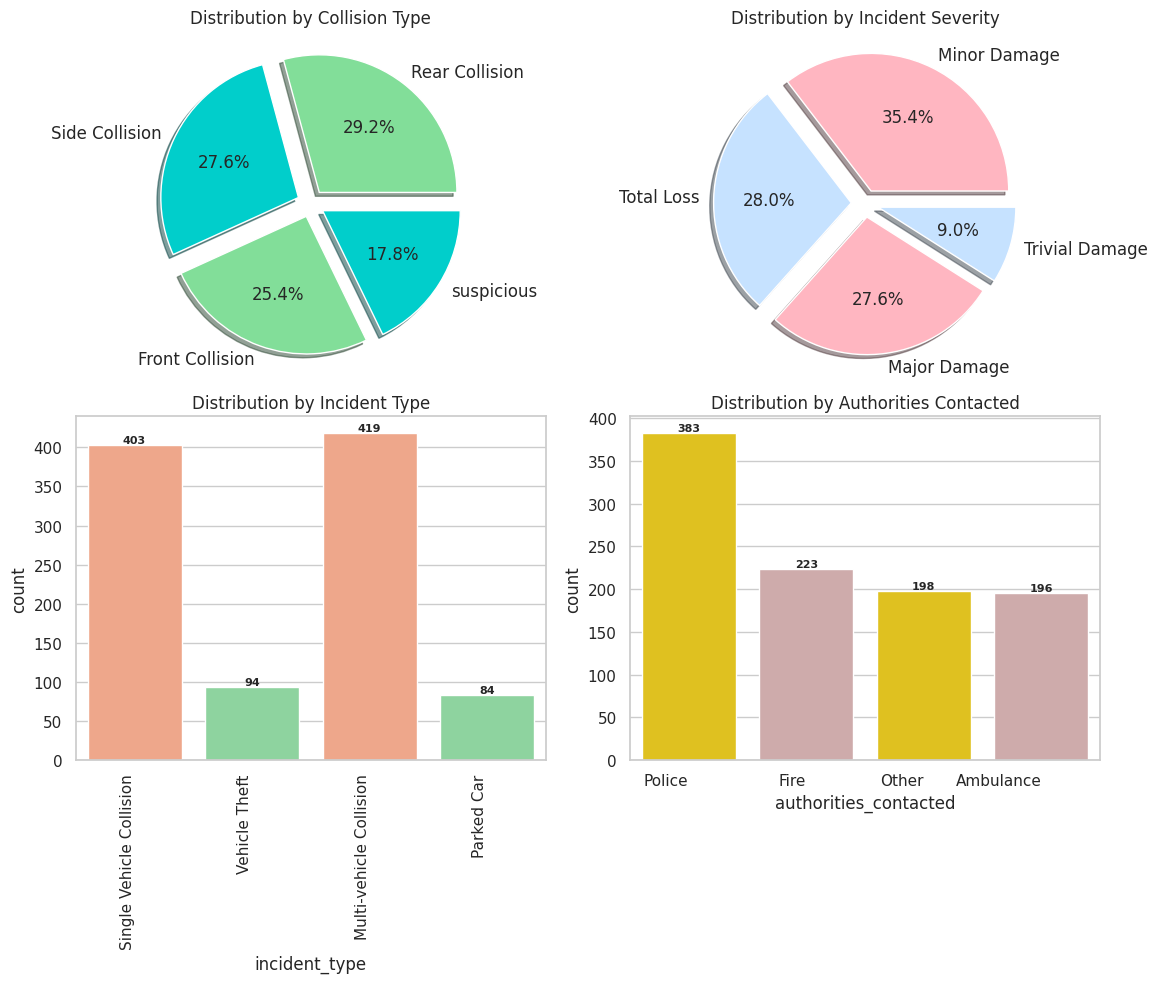

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# **Collision Type Pie Chart (Top Left)**
explode_source = [0.1] * len(train['collision_type'].value_counts())
axes[0, 0].pie(train['collision_type'].value_counts(), explode=explode_source, autopct='%1.1f%%', shadow=True,
               labels=train['collision_type'].value_counts().index,
               colors=["#82DE99", "#01CECB"], textprops={'fontsize':12})
axes[0, 0].set_title('Distribution by Collision Type')

# **Incident Severity Pie Chart (Top Right)**
explode_severity = [0.1] * len(train['incident_severity'].value_counts())
axes[0, 1].pie(train['incident_severity'].value_counts(), explode=explode_severity, autopct='%1.1f%%', shadow=True,
               labels=train['incident_severity'].value_counts().index,
               colors=["#FFB6C1", "#C6E2FF"], textprops={'fontsize':12})
axes[0, 1].set_title('Distribution by Incident Severity')

# **Incident Type Countplot (Bottom Left)**
t=sns.countplot(x=train['incident_type'], palette=['#FFA07A', '#82DE99'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution by Incident Type')
for container in t.containers:
  t.bar_label(container,fmt='%d',label_type='edge',fontweight='bold',fontsize=8)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90, ha='right')

# **Authorities Contacted Countplot (Bottom Right)**
a=sns.countplot(x=train['authorities_contacted'], palette=["#FFD700", '#D4A5A5'], ax=axes[1, 1])
axes[1, 1].set_title('Distribution by Authorities Contacted')
for container in a.containers:
  a.bar_label(container,fmt='%d',label_type='edge',fontweight='bold',fontsize=8)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0, ha='right')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Pie Distribution fraud reported and insured sex

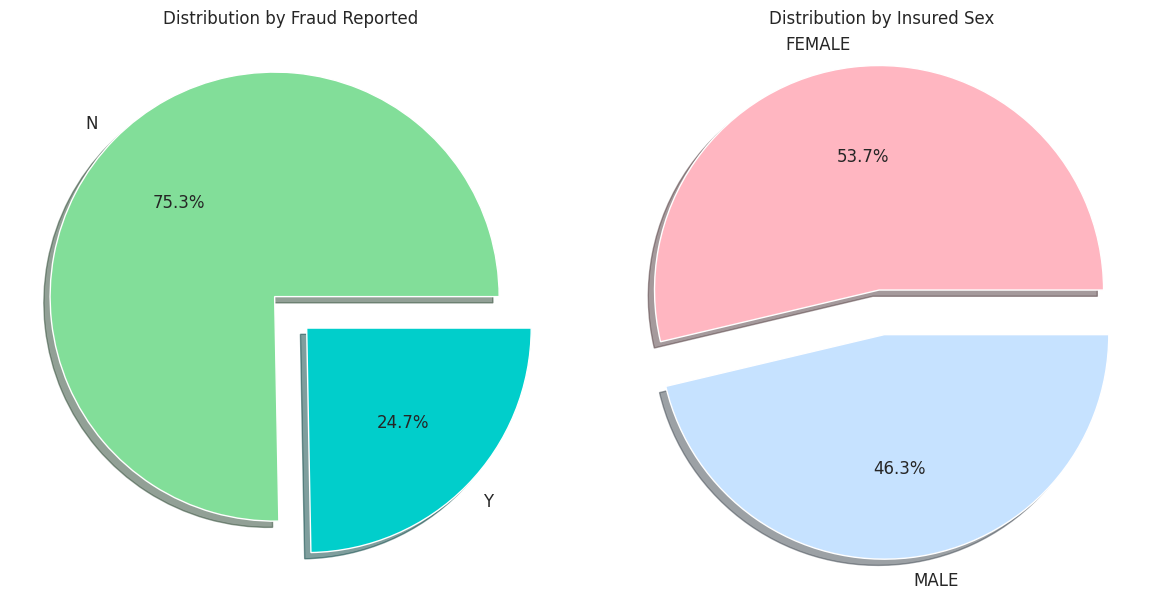

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# **Pie Chart for Fraud Reported**
explode_source = [0.1] * len(train['fraud_reported'].value_counts())
axes[0].pie(train['fraud_reported'].value_counts(), explode=explode_source, autopct='%1.1f%%', shadow=True,
            labels=train['fraud_reported'].value_counts().index,
            colors=["#82DE99", "#01CECB"], textprops={'fontsize':12})
axes[0].set_title('Distribution by Fraud Reported')

# **Pie Chart for Insured Sex**
explode_sex = [0.1] * len(train['insured_sex'].value_counts())
axes[1].pie(train['insured_sex'].value_counts(), explode=explode_sex, autopct='%1.1f%%', shadow=True,
            labels=train['insured_sex'].value_counts().index,
            colors=["#FFB6C1", "#C6E2FF"], textprops={'fontsize':12})
axes[1].set_title('Distribution by Insured Sex')

plt.tight_layout()
plt.show()


# Tree Map Categorical cols

In [69]:
fig = px.treemap(train, path=['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported'],
                 title="Treemap of Categorical Features")

# Show the plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Distribution of Education level - Fraud reported

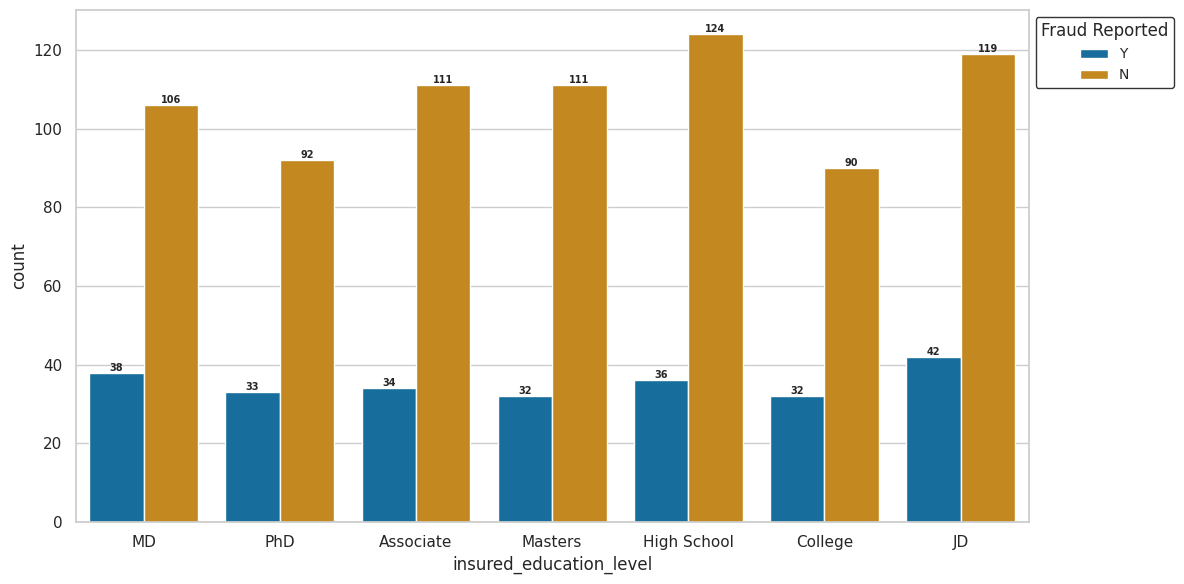

In [70]:
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility
i = sns.countplot(x=train['insured_education_level'], hue=train['fraud_reported'], palette='colorblind')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)  # Slight tilt instead of full 90°

# Add labels on bars
for container in i.containers:
    i.bar_label(container, fmt='%d', label_type='edge', fontweight='bold', fontsize=7)

plt.legend(title="Fraud Reported", title_fontsize=12, fontsize=10, loc="upper left", bbox_to_anchor=(1, 1), frameon=True, edgecolor="black")

plt.tight_layout()  # Prevent clipping of labels

plt.show()


# Scatter plot Age - Policy_anual_Premium

In [71]:
fig = px.scatter(train, x="age", y="policy_annual_premium",
                 title="Annual Premium vs. Customer Age",
                 labels={"customer_age": "Age", "policy_annual_premium": "Annual Premium ($)"},
                 template="plotly_white")

fig.show()

# Distribution of Policy Annual Premium

In [72]:
fig = px.histogram(train, x="policy_annual_premium", nbins=50,
                   title="Distribution of Policy Annual Premiums",
                   labels={"policy_annual_premium": "Annual Premium ($)"},
                   template="plotly_white")

fig.update_layout(bargap=0.1, xaxis_tickformat="$,.0f")  # Format y-axis with $
fig.show()


# Distribution of  Incident Cities

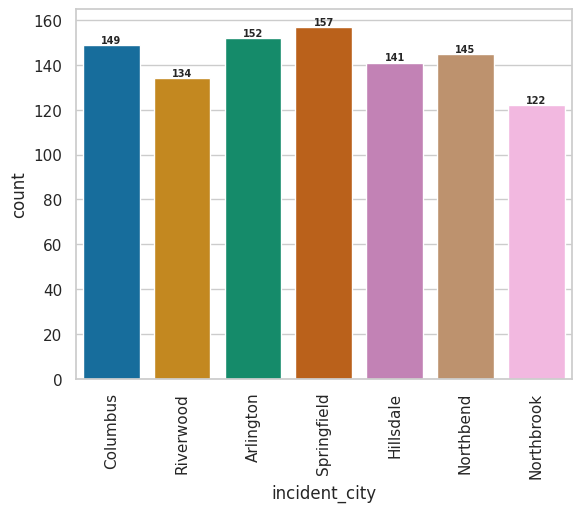

In [73]:
c=sns.countplot(x=train['incident_city'],palette='colorblind')
plt.xticks(rotation=90)
for container in c.containers:
  c.bar_label(container, fmt='%d',label_type='edge',fontweight='bold',fontsize=7)
plt.show()

# Visualize Incident Date distribution

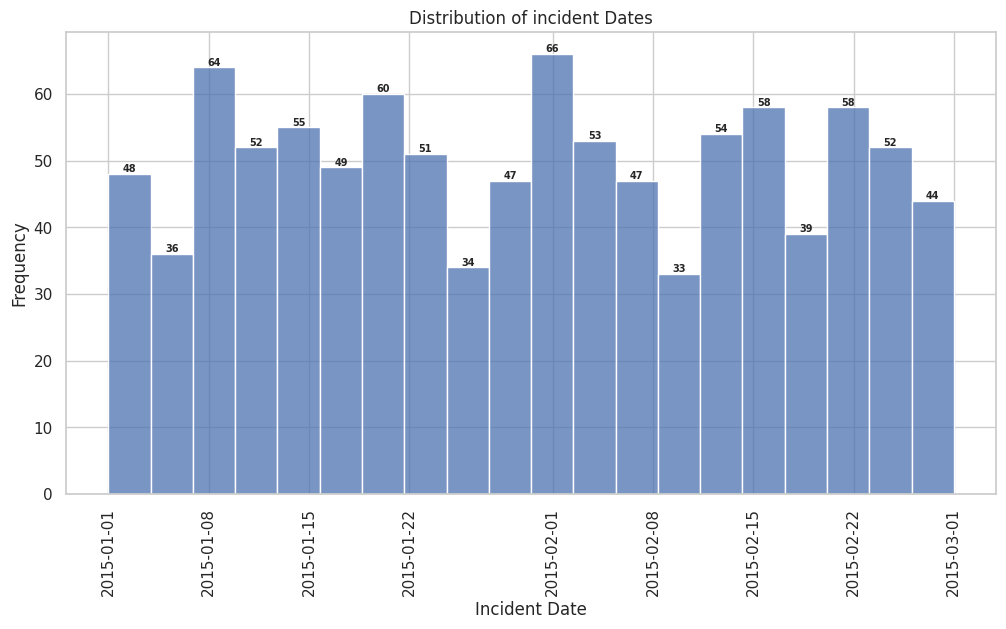

In [74]:
plt.figure(figsize=(12, 6))
s=sns.histplot(train['incident_date'], bins=20)
plt.title('Distribution of incident Dates')
plt.xlabel('Incident Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
for container in s.containers:
  s.bar_label(container, fmt='%d',label_type='edge',fontsize=7,fontweight='bold')
plt.show()

In [75]:
train.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,suspicious,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,suspicious,0,0,suspicious,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,suspicious,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,suspicious,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Tree map 'insured_education_level', 'insured_hobbies', 'insured_occupation

In [111]:
fig=px.treemap(train, path=['insured_education_level',
 'insured_hobbies','insured_occupation'],title='Treemap of Categorical Features')
fig.show()

In [108]:
fig=px.sunburst(train,
                path=['insured_sex','insured_relationship'],
                values='total_claim_amount',
                title='Insured Relationship ',
                labels={'insured_sex':'Sex','insured_relationship':'Relationship'},
                height=600,width=800)
fig.update_layout(
    xaxis_title='Insured',
    yaxis_title='Insured Relationship ',
    plot_bgcolor='rgb(243, 243, 243)',
    font=dict(family="Arial, sans-serif", size=12)
)
fig.show()

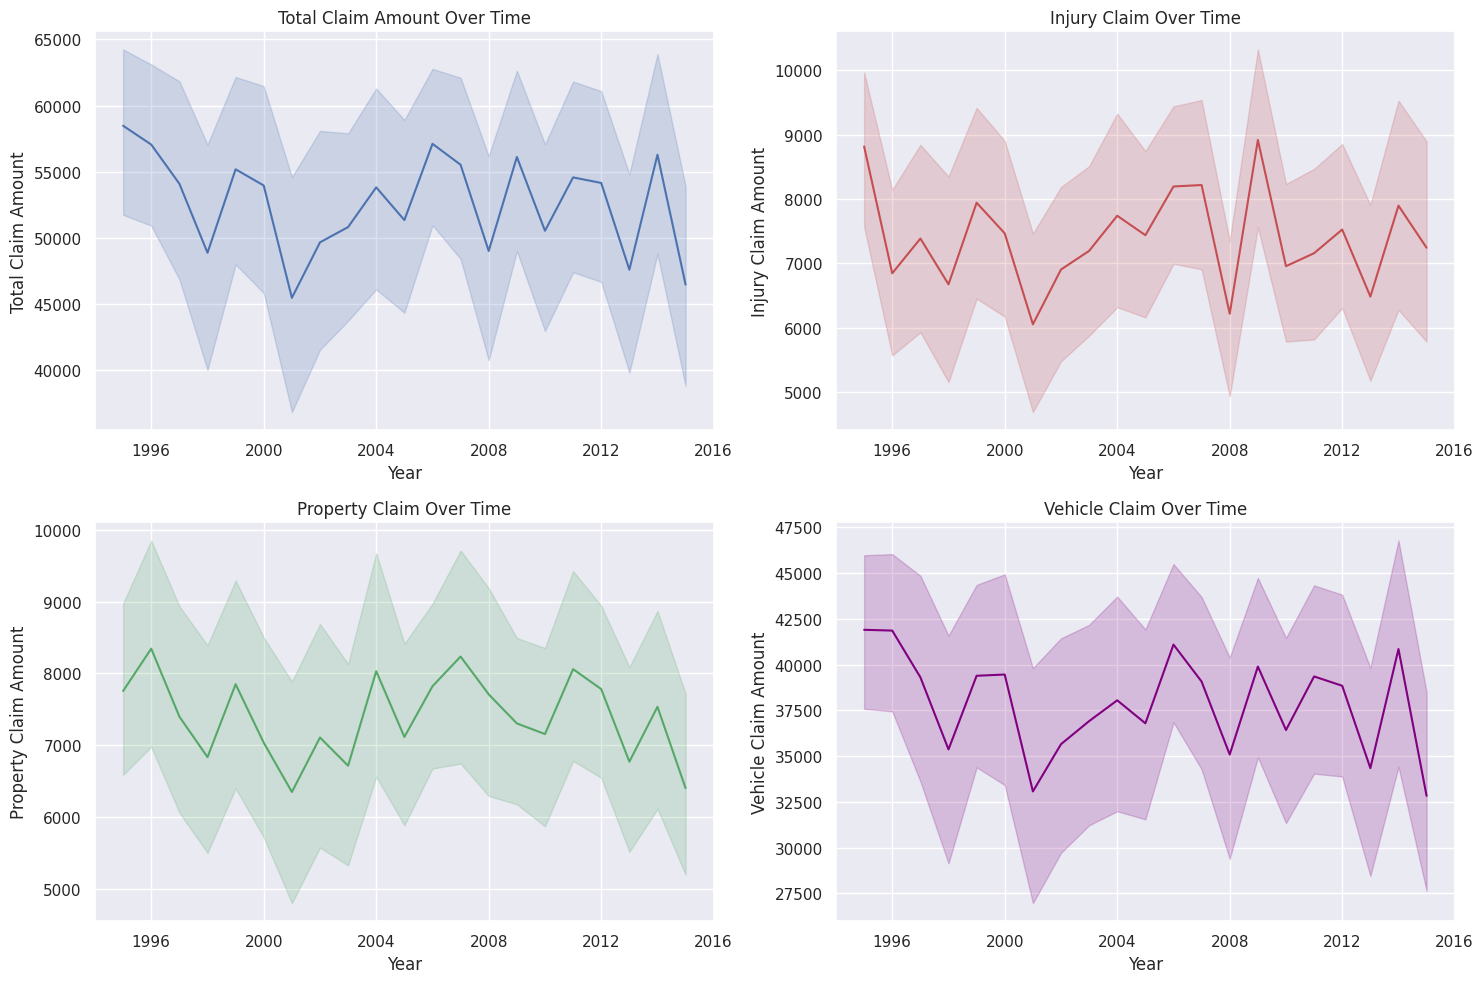

In [105]:
# Convert 'auto_year' to datetime if not already
train['auto_year'] = pd.to_datetime(train['auto_year'], format='%Y')

# Set figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 layout

# Plot each claim type in its subplot
sns.lineplot(ax=axes[0, 0], x='auto_year', y='total_claim_amount', data=train, color='b')
axes[0, 0].set_title("Total Claim Amount Over Time")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Total Claim Amount")

sns.lineplot(ax=axes[0, 1], x='auto_year', y='injury_claim', data=train, color='r')
axes[0, 1].set_title("Injury Claim Over Time")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Injury Claim Amount")

sns.lineplot(ax=axes[1, 0], x='auto_year', y='property_claim', data=train, color='g')
axes[1, 0].set_title("Property Claim Over Time")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Property Claim Amount")

sns.lineplot(ax=axes[1, 1], x='auto_year', y='vehicle_claim', data=train, color='purple')
axes[1, 1].set_title("Vehicle Claim Over Time")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Vehicle Claim Amount")

# Adjust layout
plt.tight_layout()
plt.show()


# Distribution of Total Claim Amount

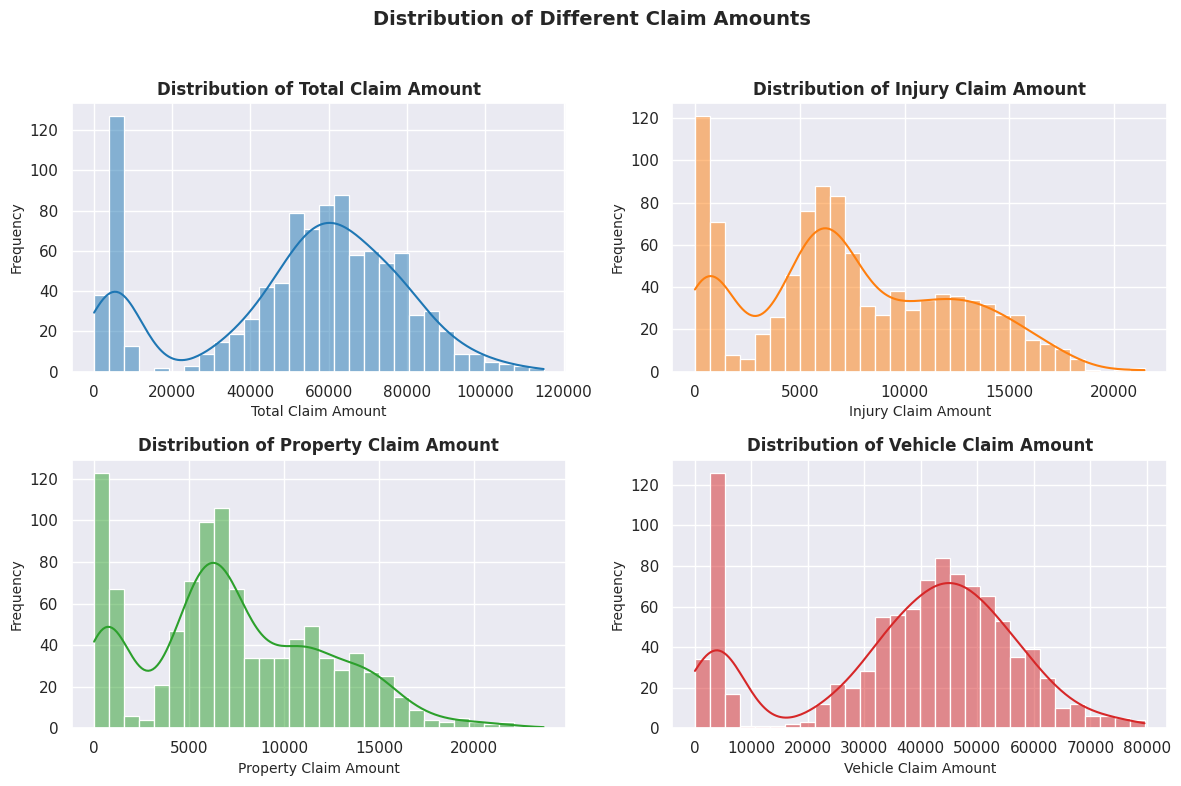

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid layout
fig.suptitle('Distribution of Different Claim Amounts', fontsize=14, fontweight='bold')

# List of claim types
claims = ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']
titles = ['Total Claim Amount', 'Injury Claim Amount', 'Property Claim Amount', 'Vehicle Claim Amount']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Different colors

# Loop through claims and create subplots
for i, ax in enumerate(axes.flatten()):  # Flatten for easy indexing
    sns.histplot(train[claims[i]], bins=30, kde=True, color=colors[i], ax=ax)
    ax.set_title(f'Distribution of {titles[i]}', fontsize=12, fontweight='bold')
    ax.set_xlabel(f'{titles[i]}', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

# Relationship Between Injury, Property & Vehicle Claims

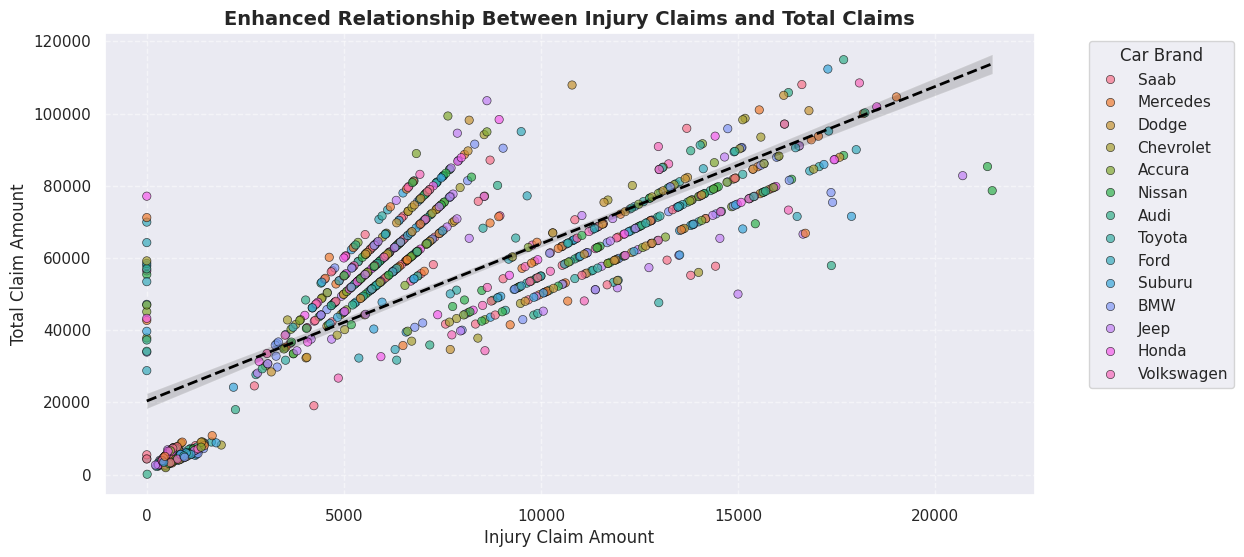

In [93]:
plt.figure(figsize=(12, 6))

# Scatter plot with better visualization
sns.scatterplot(x=train['injury_claim'],
                y=train['total_claim_amount'],
                hue=train['auto_make'],
                alpha=0.7,  # Transparency
                palette='husl',  # Improved colors
                edgecolor='black')

# Adding trend line (regression)
sns.regplot(x=train['injury_claim'],
            y=train['total_claim_amount'],
            scatter=False,
            color='black',
            line_kws={'linewidth': 2, 'linestyle': 'dashed'})

plt.title("Enhanced Relationship Between Injury Claims and Total Claims", fontsize=14, fontweight='bold')
plt.xlabel("Injury Claim Amount", fontsize=12)
plt.ylabel("Total Claim Amount", fontsize=12)
plt.legend(title="Car Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Analysis & Insights
Positive Correlation

The trend shows that as injury claim amounts increase, total claims also increase.
This indicates that injury claims are a major component of total claims.
Clusters & Patterns

Multiple linear patterns suggest that claims might be grouped based on policy limits or regulations.
Some brands might have higher average injury claim payouts than others.
Outliers Detected

A few extremely high claim values (above $100,000) need further investigation.
These may indicate severe accidents, fraud, or policy differences.
Brand-Specific Trends

Some brands (e.g., Saab, Honda) appear in higher claim brackets, meaning they might be more accident-prone or have costlier repairs.


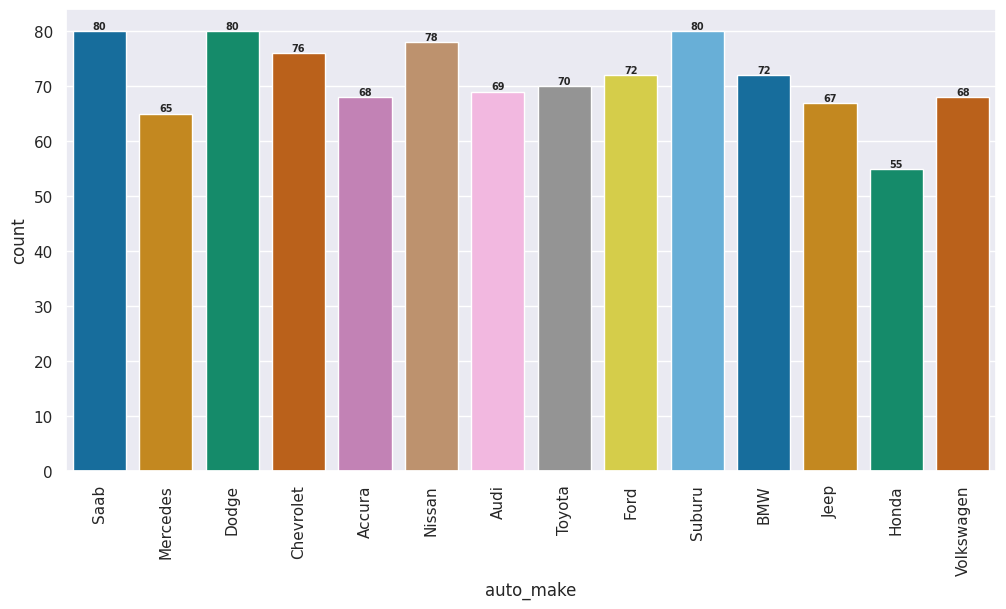

In [84]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
m=sns.countplot(x=train['auto_make'],palette="colorblind")
plt.xticks(rotation=90)
for container in m.containers:
  m.bar_label(container,fmt='%d',label_type='edge',fontweight='bold',fontsize=7)
plt.show()

# Analysis & Insights

# 1. Temporal Trends:
#    - Quarterly and yearly claim trends were analyzed using line plots and rolling averages.  
#    - This helps identify seasonal patterns, growth/decline in claims over time, and potential outliers (high claim quarters/years).  We highlighted the top 5 revenue periods to visualize peak claim periods.
#    - *Business Insight:* Understanding claim trends over time is crucial for resource allocation, budget forecasting and identifying potential contributing factors to high claim periods.  For example, high claims during a certain quarter might warrant further investigation into the underlying causes (e.g. weather conditions, increased vehicle traffic).

# 2. Categorical Feature Distributions:
#    - Pie charts and countplots visualized the distributions of categorical features (property damage, bodily injuries, witnesses, police reports, collision type, incident severity, etc.).
#    - *Business Insight*: These visualizations highlight the frequency of different categories within each feature. For example, if a disproportionate number of incidents involve a specific collision type, it may suggest a need for targeted safety initiatives or driver education programs. We also explored police reports and property damage to understand the frequency of both.
#    - Incident hour, number of vehicles involved and incident type insights are also drawn.

# 3. Relationships between Features:
#   - Scatter plot: 'Age' vs. 'Policy Annual Premium'.
#     - *Business Insight:*  This helps identify any correlation between age and annual premium. Understanding this relationship aids in premium setting and targetting specific demographics.
#   - Histograms: Distribution of 'Policy Annual Premium' and 'Incident Cities'
#     - *Business Insight:* Distribution of annual premium helps in understanding the concentration of various premium levels within the portfolio, and it enables more fine tuned pricing decisions. The distribution of incident cities helps identify high-risk areas that require more attention and proactive measures.
#   - Treemaps: Visualizations for various categories including policy state, CSL, insured demographics, incident details, and fraud reports.  
#     - *Business Insight:* This provided hierarchical relationships and the proportion of each category within different combinations for granular insights.
#   - Sunburst Charts:  'insured_sex' and 'insured_relationship'
#     - *Business Insight:* Visualizes the relationship between total claim amounts and different combinations of insured sex and relationships.
#   - Lineplots: Analysis of 'auto_year' vs different claim types ('total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim')
#     - *Business Insight*: This visualizes the trends of different claim types over time. This is very important in observing the increase or decrease of claim types and amounts over the years. This helps insurers adjust their pricing models based on yearly changes to the vehicle or demographic conditions.
#    - Histograms of various claim amounts. Helps to understand the distribution of various claim amounts and identifies if there are significant differences between them.
#    - Scatter plot of Injury Claim vs total claim amount to understand the correlation and potential clusters and outliers.

# 4. Fraud Analysis:
#    - Visualizations explored the relationship between insured education level and fraud reported.
#    - *Business Insight:*  This helps in identifying potential fraud patterns. Individuals with specific educational levels could have a higher fraud rate, which might necessitate more stringent verification or investigation processes.


# Steps:
# 1. Data Loading and Preparation: The code first imports necessary libraries and loads the insurance claim data.
# 2. Temporal Analysis:  Time series analysis (quarterly and yearly claims) was performed.
# 3. Categorical Feature Analysis:  Distributions were visualized.
# 4. Feature Relationship Analysis: Scatterplots, histograms, treemaps, sunburst and lineplots explored correlations and patterns between different features, which also includes distribution of different claim amounts.
# 5. Fraud Related Analysis: The frequency of fraud reports in relation to insured characteristics was investigated.


# Why these steps were chosen:
# - Temporal analysis: Identifying trends and seasonality is crucial for predictive modeling.
# - Categorical feature analysis: Understanding the distribution of categorical features is needed to discover important features and insights to investigate further.
# - Relationship analysis:  Scatterplots and histograms provide an understanding of correlations and possible relationships between features. Treemaps, sunburst and lineplots provide another means of discovering relationships.  Fraudulent activity analysis also falls under this.

# What we understood:
# - Claim amounts and patterns over time.
# - The distribution of various features and their relationships.
# - Possible relationships between different features.
# - Identification of potential high-risk areas and demographics.
# - Potential fraud indicators.
